<a href="https://colab.research.google.com/github/RinzCSGO/data-science/blob/main/traficLight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Thư viện
import numpy as np
import skfuzzy as fz
from skfuzzy import control as ctrl

--------------------------------

Arrival : Người trên tuyến đèn xanh

Queue : Người chờ đèn đỏ

Extension : thời gian đèn đỏ tăng lên

In [76]:
## xây dựng mảng không gian tương ứng
X = [0, 16, 26, 36, 46, 56]
Y = [0,8,14,20,26,32]
Z = np.arange(0,24,4)
## Tiền đề và kết luận
A = ctrl.Antecedent( X, "Arrival")
Q = ctrl.Antecedent( Y, "Queue")
E = ctrl.Consequent( Z, "Extension")

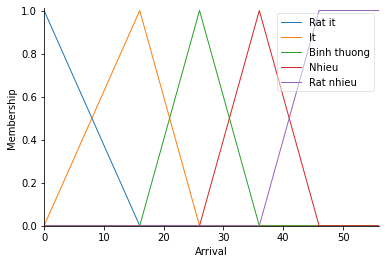

In [62]:
A["Rat it"] = fz.trimf( A.universe,[0,0,16])
A["It"] = fz.trimf( A.universe,[0,16,26])
A["Binh thuong"] = fz.trimf( A.universe,[16,26,36])
A["Nhieu"] = fz.trimf( A.universe,[26,36,46])
A["Rat nhieu"] = fz.trapmf( A.universe,[36,46,56,56])
A.view()

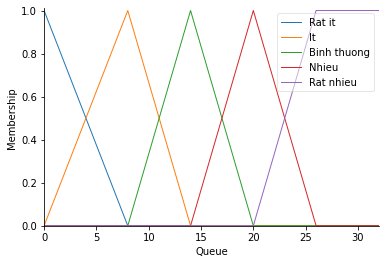

In [63]:
Q["Rat it"] = fz.trimf( Q.universe,[0,0,8])
Q["It"] = fz.trimf( Q.universe,[0,8,14])
Q["Binh thuong"] = fz.trimf( Q.universe,[8,14,20])
Q["Nhieu"] = fz.trimf( Q.universe,[14,20,26])
Q["Rat nhieu"] = fz.trapmf( Q.universe,[20,26,32,32])
Q.view()

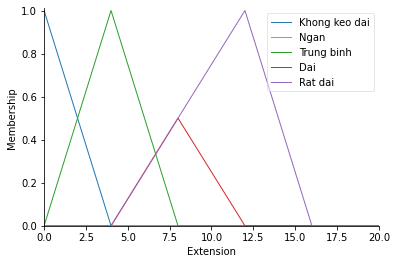

In [77]:
E["Khong keo dai"] = fz.trimf( Q.universe,[0,0,4])
E["Ngan"] = fz.trimf( Q.universe,[0,4,8])
E["Trung binh"] = fz.trimf( Q.universe,[4,8,12])
E["Dai"] = fz.trimf( Q.universe,[8,12,16])
E["Rat dai"] = fz.trapmf( Q.universe,[12,16,24,24])
E.view()

#Tập luật:

In [ ]:
R1  = ctrl.Rule(  Q["Rat it"] & A["Rat it"], E["Khong keo dai"] )
R2  = ctrl.Rule(  Q["Rat it"] & A["It"], E["Ngan"] )
R3  = ctrl.Rule(  Q["Rat it"] & A["Binh thuong"], E["Trung binh"] )
R4  = ctrl.Rule(  Q["Rat it"] & A["Nhieu"], E["Dai"] )
R5  = ctrl.Rule(  Q["Rat it"] & A["Rat nhieu"], E["Rat dai"] )

R6  = ctrl.Rule(  Q["It"]  & A["Rat it"], E["Khong keo dai"]  )
R7  = ctrl.Rule(  Q["It"]  & A["It"], E["Ngan"] )
R8  = ctrl.Rule(  Q["It"]  & A["Binh thuong"], E["Trung binh"] )
R9  = ctrl.Rule(  Q["It"]  & A["Nhieu"], E["Dai"] )
R10 = ctrl.Rule(  Q["It"]  & A["Rat nhieu"], E["Dai"] )

R11 = ctrl.Rule(  Q["Binh thuong"] & A["Rat it"], E["Khong keo dai"] )
R12 = ctrl.Rule(  Q["Binh thuong"] & A["It"], E["Khong keo dai"] )
R13 = ctrl.Rule(  Q["Binh thuong"] & A["Binh thuong"], E["Ngan"] )
R14 = ctrl.Rule(  Q["Binh thuong"] & A["Nhieu"], E["Trung binh"] )
R15 = ctrl.Rule(  Q["Binh thuong"] & A["Rat nhieu"], E["Dai"] )

R16 = ctrl.Rule(  Q["Nhieu"] & A["Rat it"], E["Khong keo dai"] )
R17 = ctrl.Rule(  Q["Nhieu"] & A["It"], E["Khong keo dai"] )
R18 = ctrl.Rule(  Q["Nhieu"] & A["Binh thuong"], E["Khong keo dai"] )
R19 = ctrl.Rule(  Q["Nhieu"] & A["Nhieu"], E["Ngan"] )
R20 = ctrl.Rule(  Q["Nhieu"] & A["Rat nhieu"], E["Trung binh"])

R21 = ctrl.Rule(  Q["Rat nhieu"] & A["Rat it"], E["Khong keo dai"] )
R22 = ctrl.Rule(  Q["Rat nhieu"] & A["It"], E["Khong keo dai"] )
R23 = ctrl.Rule(  Q["Rat nhieu"] & A["Binh thuong"], E["Khong keo dai"])
R24 = ctrl.Rule(  Q["Rat nhieu"] & A["Nhieu"], E["Khong keo dai"])
R25 = ctrl.Rule(  Q["Rat nhieu"] & A["Rat nhieu"], E["Ngan"])

In [ ]:
rules = [R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24,R25]

In [ ]:
##model
system = ctrl.ControlSystemSimulation( ctrl.ControlSystem(rules) )

**INPUT :**


In [68]:
##input
A = int(input("Số phương tiện lưu thông ở đèn xanh [0,56]: "))
Q = int(input("Số phương tiện chờ ở đèn đỏ [0,32]: "))


system.input["Arrival"] = A
system.input["Queue"] = Q


Số phương tiện lưu thông ở đèn xanh [0,56]: 40
Số phương tiện chờ ở đèn đỏ [0,32]: 30


**Process & output :**

---------------------------------------------------------
Với số phương tiện lưu thông ở đèn xanh là 40 và số phương tiền chờ ở đèn đỏ 30;
Thì thời gian kéo dài đèn xanh là : 1 giây.


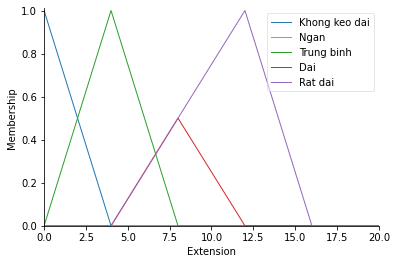

In [69]:
system.compute() 
oE = system.output["Extension"];oE = int(oE)
E.view( system )

print("---------------------------------------------------------")
print("Với số phương tiện lưu thông ở đèn xanh là {} và số phương tiền chờ ở đèn đỏ {};\nThì thời gian kéo dài đèn xanh là : {} giây.".format(A,Q,oE))